# benchmark code

### Explanation of the Code

1. **Class Definition**: The `KNN` class is defined with methods for fitting the model and making predictions.
2. **Initialization**: The `__init__` method initializes the number of neighbors `k`.
3. **Fitting the Model**: The `fit` method stores the training data (`X_train` and `y_train`).
4. **Making Predictions**:
    - The `predict` method iterates over each test sample and calls the `_predict` method.
    - The `_predict` method calculates the Euclidean distance from the test point to all training points, finds the indices of the `k` nearest neighbors, and retrieves their labels.
    - The most common label among the nearest neighbors is determined using `Counter`.
5. **Example Usage**: The code includes a simple example with a small dataset. It fits the k-NN model to the training data and makes predictions on some test data.

# custom code

In [5]:
import numpy as np

def conv2d(input_image, kernel, stride=1, padding=0):
    """
    Performs 2D convolution on an input image using a given kernel.
    
    Args:
        input_image (numpy.ndarray): Input image as a 2D or 3D NumPy array.
        kernel (numpy.ndarray): Convolution kernel as a 2D NumPy array.
        stride (int, optional): Stride value for the convolution. Defaults to 1.
        padding (int, optional): Padding value for the input image. Defaults to 0.
        
    Returns:
        numpy.ndarray: Output feature map after applying 2D convolution.
    """
    # Get the dimensions of the input image and kernel
    input_height, input_width = input_image.shape[:2]
    kernel_height, kernel_width = kernel.shape
    
    # Calculate the output dimensions based on padding and stride
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1
    
    # Create a padded input image if padding is specified
    if padding > 0:
        padded_image = np.pad(input_image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        padded_image = input_image
    
    # Create the output feature map
    output_feature_map = np.zeros((output_height, output_width))
    
    # Perform 2D convolution
    for i in range(output_height):
        for j in range(output_width):
            x = i * stride
            y = j * stride
            output_feature_map[i, j] = np.sum(padded_image[x:x+kernel_height, y:y+kernel_width] * kernel)
    
    return output_feature_map

# example application
input_image = np.array([[1, 2, 3, 4],
                        [5, 6, 7, 8],
                        [9, 10, 11, 12],
                        [13, 14, 15, 16]])

kernel = np.array([[1, 0, 1],
                   [0, 1, 0],
                   [1, 0, 1]])

output = conv2d(input_image, kernel, stride=1, padding=1)
print(output)


[[ 7. 14. 17. 11.]
 [17. 30. 35. 22.]
 [29. 50. 55. 34.]
 [23. 34. 37. 27.]]


also visualizing input_image and output feature_map after convolution

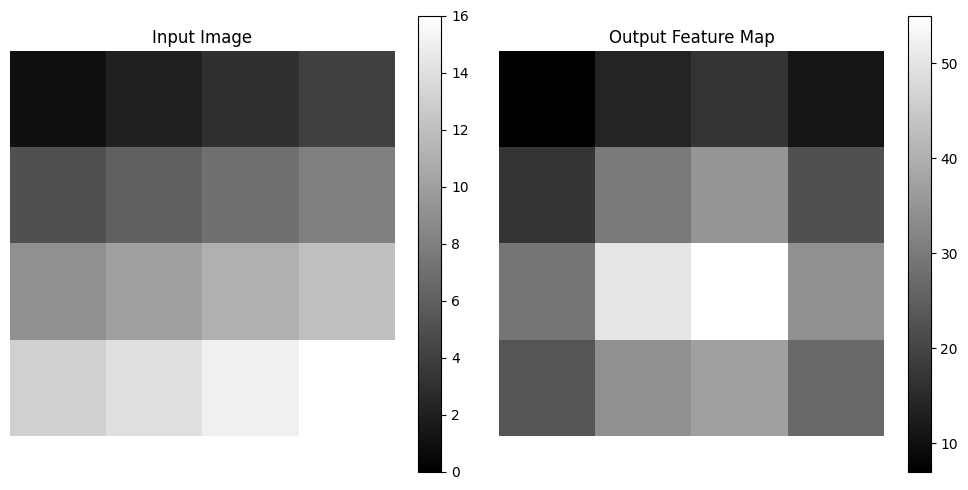

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def conv2d(input_image, kernel, stride=1, padding=0):
    input_height, input_width = input_image.shape[:2]
    kernel_height, kernel_width = kernel.shape
    
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1
    
    if padding > 0:
        padded_image = np.pad(input_image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        padded_image = input_image
    
    output_feature_map = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            x = i * stride
            y = j * stride
            output_feature_map[i, j] = np.sum(padded_image[x:x+kernel_height, y:y+kernel_width] * kernel)
    
    return output_feature_map

# Sample input image and kernel
input_image = np.array([[1, 2, 3, 4],
                        [5, 6, 7, 8],
                        [9, 10, 11, 12],
                        [13, 14, 15, 16]], dtype=float)

kernel = np.array([[1, 0, 1],
                   [0, 1, 0],
                   [1, 0, 1]], dtype=float)

# Perform convolution
output = conv2d(input_image, kernel, stride=1, padding=1)

# Visualization
plt.figure(figsize=(10, 5))

# Plot input image
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(input_image, cmap='gray', vmin=0, vmax=16)
plt.colorbar()
plt.axis('off')

# Plot output feature map
plt.subplot(1, 2, 2)
plt.title("Output Feature Map")
plt.imshow(output, cmap='gray', vmin=np.min(output), vmax=np.max(output))
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()


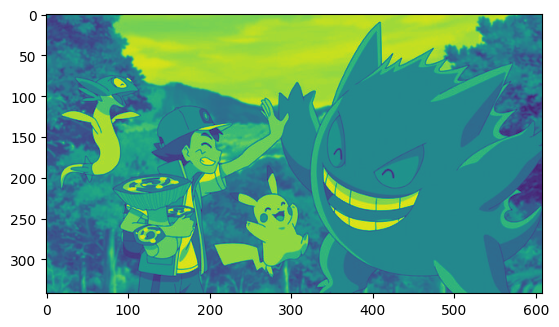

In [13]:
# Load the image
image_path = r'..\..\0. datasets\pokemon1.jpg'  # Replace with your image path
image = Image.open(image_path)

# Convert to grayscale
image_gray = image.convert('L')  # 'L' mode is for grayscale
input_image = np.array(image_gray)

plt.imshow(input_image)

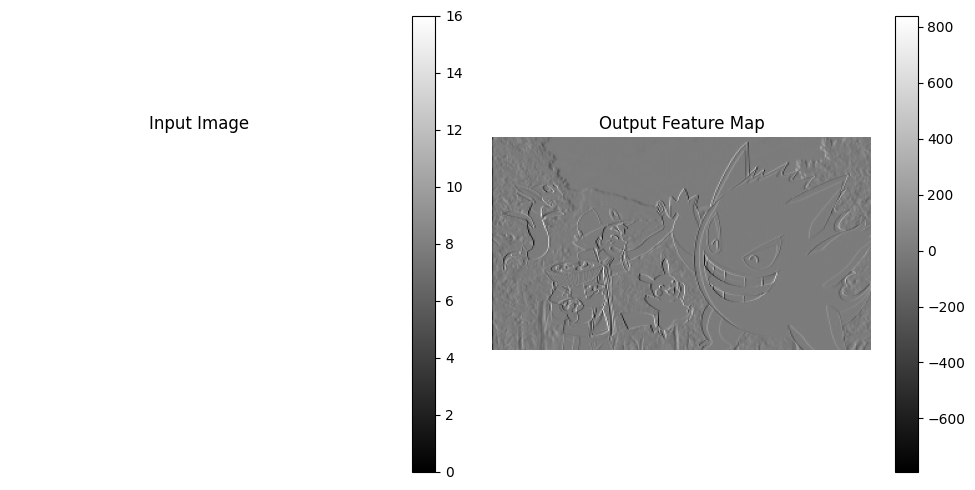

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def conv2d(input_image, kernel, stride=1, padding=0):
    input_height, input_width = input_image.shape[:2]
    kernel_height, kernel_width = kernel.shape
    
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1
    
    if padding > 0:
        padded_image = np.pad(input_image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        padded_image = input_image
    
    output_feature_map = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            x = i * stride
            y = j * stride
            output_feature_map[i, j] = np.sum(padded_image[x:x+kernel_height, y:y+kernel_width] * kernel)
    
    return output_feature_map

# Sample input image and kernel
# Load the image
image_path = r'..\..\0. datasets\pokemon1.jpg'  # Replace with your image path
image = Image.open(image_path)

# Convert to grayscale
image_gray = image.convert('L')  # 'L' mode is for grayscale
input_image = np.array(image_gray)

# different kernels
# Edge Detection Kernels
# Sobel Kernel (Horizontal Edges):
sobel_horizontal = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]], dtype=float)
# Sobel Kernel (Vertical Edges):
sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]], dtype=float)
# Laplacian Kernel (Edge Detection):
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]], dtype=float)

# Blurring Kernels
# Box Blur Kernel:
box_blur_kernel = np.array([[1/9, 1/9, 1/9],
                            [1/9, 1/9, 1/9],
                            [1/9, 1/9, 1/9]], dtype=float)
# Gaussian Blur Kernel:
gaussian_blur_kernel = np.array([[1/16, 2/16, 1/16],
                                  [2/16, 4/16, 2/16],
                                  [1/16, 2/16, 1/16]], dtype=float)

# Emboss Kernel
# Emboss Kernel:
emboss_kernel = np.array([[2, 0, 0],
                          [0, -1, 0],
                          [0, 0, -1]], dtype=float)

# Motion Blur Kernel
# Simple Motion Blur Kernel (horizontal):
motion_blur_kernel = np.array([[1/3, 1/3, 1/3],
                                [0, 0, 0],
                                [0, 0, 0]], dtype=float)

kernel = sobel_horizontal

# Perform convolution
output = conv2d(input_image, kernel, stride=2, padding=1)

# Visualization
plt.figure(figsize=(10, 5))

# Plot input image
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(input_image, cmap='gray', vmin=0, vmax=16)
plt.colorbar()
plt.axis('off')

# Plot output feature map
plt.subplot(1, 2, 2)
plt.title("Output Feature Map")
plt.imshow(output, cmap='gray', vmin=np.min(output), vmax=np.max(output))
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()
